In [1]:
%pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [7]:
titanic_df = pd.read_csv("train.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     714 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 58.6+ KB
None


In [18]:
# Data Cleaning
# Handle missing values
titanic_df.dropna(subset=['Age'], inplace=True)  # Drop rows with missing age values
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Exclude non-numeric columns
numeric_columns = titanic_df.select_dtypes(include=['number']).columns

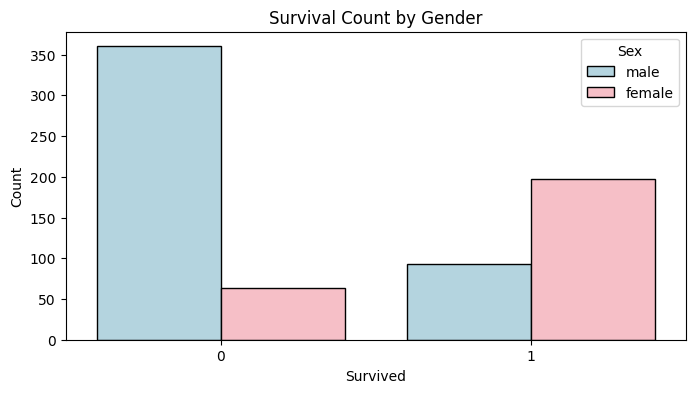

In [9]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Survived', hue='Sex', data=titanic_df, palette=['lightblue', 'lightpink'], edgecolor='black')
plt.title('Survival Count by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

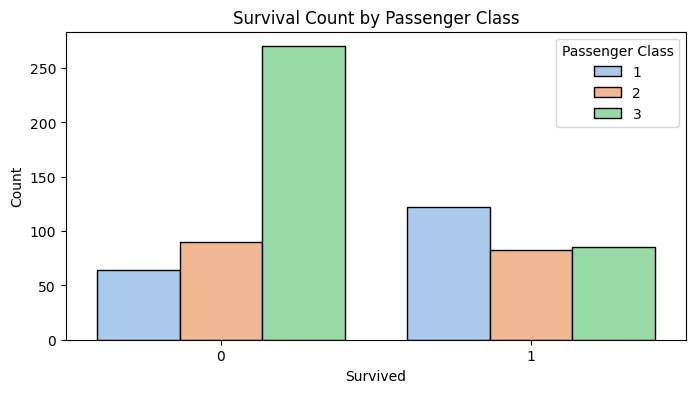

In [10]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Survived', hue='Pclass', data=titanic_df, palette='pastel', edgecolor='black')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Passenger Class')
plt.show()

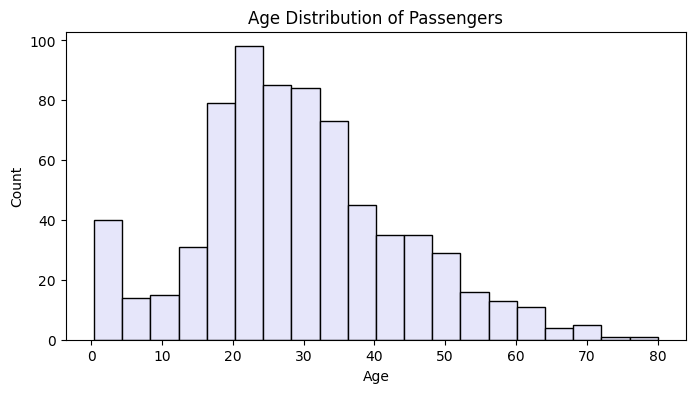

In [16]:
plt.figure(figsize=(8, 4))
plt.hist(titanic_df['Age'], bins=20, edgecolor='black', color='lavender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Passengers')
plt.show()

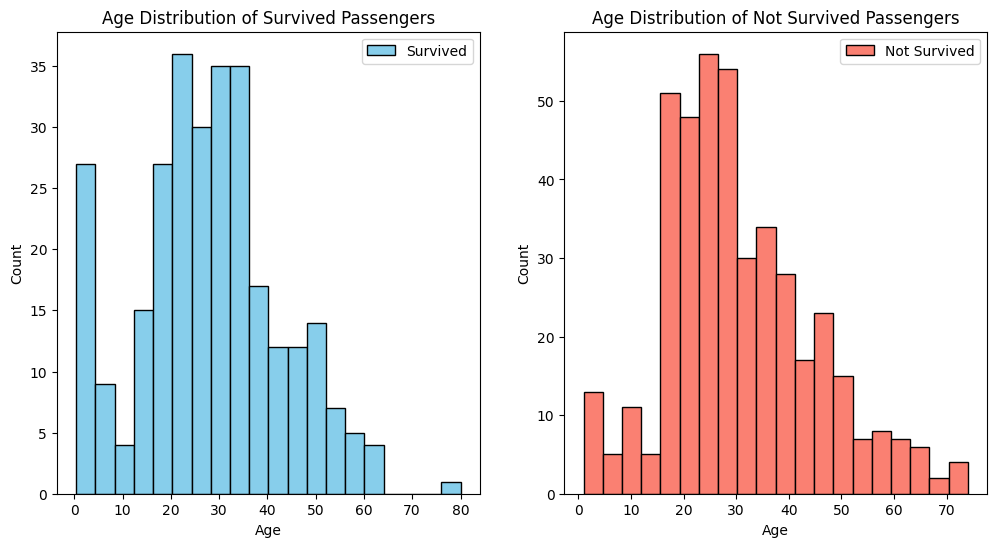

In [15]:
plt.figure(figsize=(12, 6))

# Plot histogram for passengers who survived
plt.subplot(1, 2, 1)
plt.hist(titanic_df[titanic_df['Survived'] == 1]['Age'].dropna(), bins=20, edgecolor='black', color='skyblue', label='Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Survived Passengers')
plt.legend()

# Plot histogram for passengers who did not survive
plt.subplot(1, 2, 2)
plt.hist(titanic_df[titanic_df['Survived'] == 0]['Age'].dropna(), bins=20, edgecolor='black', color='salmon', label='Not Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Not Survived Passengers')
plt.legend()

plt.show()

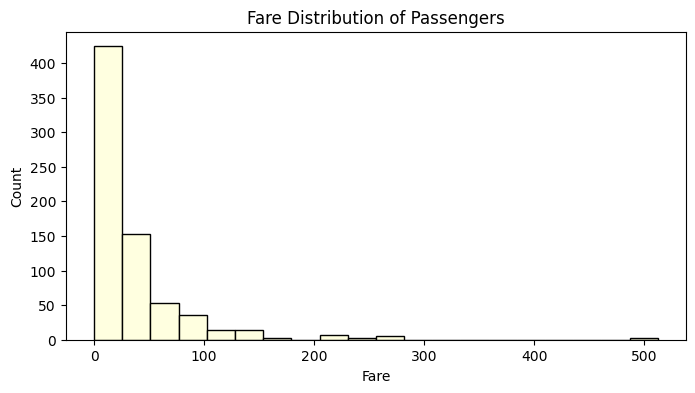

In [20]:
plt.figure(figsize=(8, 4))
plt.hist(titanic_df['Fare'], bins=20, edgecolor='black', color='lightyellow')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution of Passengers')
plt.show()

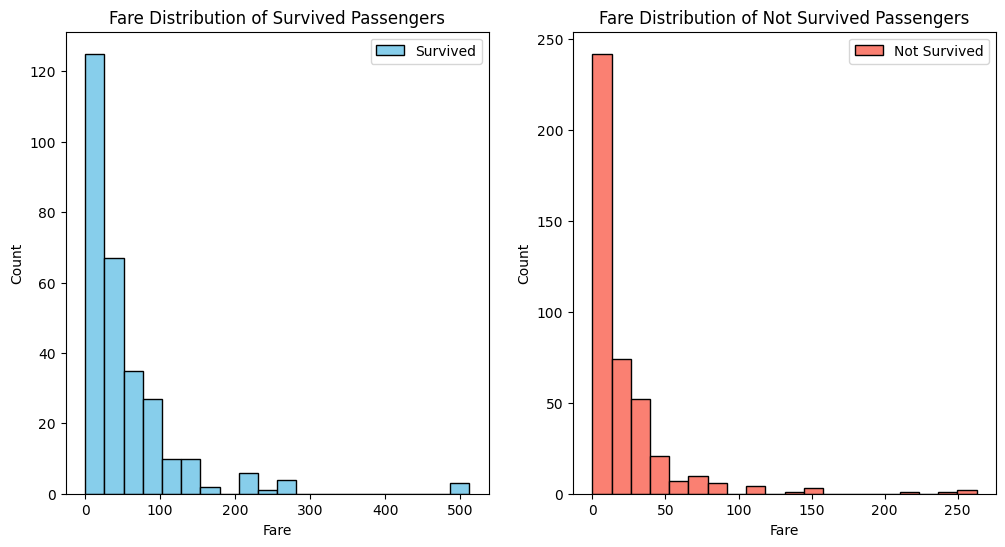

In [22]:
plt.figure(figsize=(12, 6))

# Histogram for passengers who survived
plt.subplot(1, 2, 1)
plt.hist(titanic_df[titanic_df['Survived'] == 1]['Fare'], bins=20, edgecolor='black', color='skyblue', label='Survived')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution of Survived Passengers')
plt.legend()

# Histogram for passengers who did not survive
plt.subplot(1, 2, 2)
plt.hist(titanic_df[titanic_df['Survived'] == 0]['Fare'], bins=20, edgecolor='black', color='salmon', label='Not Survived')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution of Not Survived Passengers')
plt.legend()

plt.show()